# Bayesian Multiple Regression for GWAS


## Hypothesis testing: classical approach



- Want a test to reject $H_0$ in favor of $H_a$

   - Example: 
   
       - $H_0$: region $R$ of genome has no effect on the trait
       
       - $H_a$: region $R$ of genome has an effect on the trait
       
- Test is constructed such that:       
       
    - If $H_0$ is true, probability of rejection is low (usually  < 0.05) 
    
        -  This is the type I error rate

    - If $H_a$ is true, probability of rejection is high
    
        -  This is the power of the test 
   

## Distribution of test statistic:

$T$ is the value of the test statistic. Suppose $H_0$ is revected when $|T|>CV$. 


In [2]:
using Plots

To = randn(10000)
Ta = randn(10000) .+ 6;

typeIa = sum(abs.(To) .> 2.5)/size(To,1)
powera = sum(Ta      .> 2.5)/size(Ta,1)
println("typeI error rate = ",typeIa," Power = ", powera)

histogram([To Ta],
title="",
xlabel = "Value of T", 
ylabel = "Frequency",
legend = :best,
label=["Ho" "Ha"])
png("testStat1")

typeI error rate = 0.0114 Power = 1.0


<img src="testStat1.png" />

## Type I error rate and power

Let $CV = 2.5$

Then $H_0$ is rejected when $|T| > 2.5$

  - type I error rate is: 0.0114

  - power is: 1.0

## Distribution of test statistic:

$T$ is the value of the test statistic


In [4]:
To = randn(10000)
Ta = randn(10000) + 2;

typeIb = sum(abs.(To) .> 2.5)/size(To,1)
powerb = sum(Ta       .> 2.5)/size(Ta,1)
println("typeI error rate = ",typeIb," Power = ", powerb)

typeI error rate = 0.0118 Power = 0.3048


In [5]:
histogram([To Ta],
title="",
xlabel = "Value of T", 
ylabel = "Frequency",
legend = :best,
label=["Ho" "Ha"])
png("testStat2")

<img src="testStat2.png" />

## Type I error rate and power

If $H_0$ is rejected when $|T| > 2.5$

  - type I error rate is: 0.0118

  - power is: 0.3048
  
Can increase sample size to increase power  

## Type I errors in multiple tests

Consider $n$ independent tests, each with a type I error rate of 0.05 




In [4]:
using Distributions
#using Rsvg

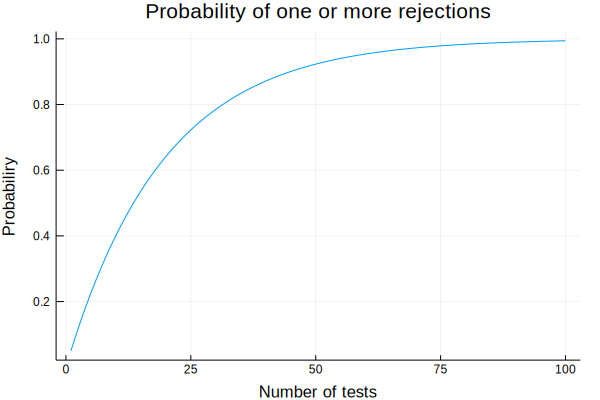

In [5]:
y = [1 - cdf(Binomial(n,0.05),0) for n = 1:100]
plot(1:100,y, legend = false,
title="Probability of one or more rejections",
xlabel = "Number of tests", 
ylabel = "Probabiliry")

## Two solutions:

- Control probability of one or more false positives among all tests

    - Bonferroni correction 
    - Multiple test penalty

- Control proportion of false positives among rejections 

    - PER
    - PFP
    - No multiple test penalty

## Posterior type I error rate (PER)

- Probability $H_0$ is true given it has been rejected

- Can think of PER as the proportion of false positives among rejections (PFP)

Let 

- $\alpha$ = type I error rate = $\Pr(T > CV|H_0)$
- $(1-\beta)$ = power = $\Pr(T > CV|H_a)$

Then

\begin{align}
\text{PER} &= \Pr(H_0 | T>CV)\\
           &= \frac{\Pr(T>CV, H_0)}{\Pr(T>CV)}\\
           &= \frac{\Pr(T>CV|H_0)\times\Pr(H_0)}{\Pr(T>CV|H_0)\times\Pr(H_0) + \Pr(T>CV|H_a)\times\Pr(H_a)}\\
           &=\frac{\alpha\times\Pr(H_0)}{\alpha\times\Pr(H_0) + (1-\beta)\times[1 - \Pr(H_0)]}
\end{align}

## Test of linkage for monogenic trait

- $\Pr(H_0) = 21/22 \approx 0.95$ (autosomal locus in humans)

- Suppose $1-\beta = 0.95$

$$
\begin{align}
\text{PER} &= \frac{0.05\times0.95}{0.05\times0.95 + 0.95\times0.05}\\
           &= 0.5
\end{align}
$$

To reduce PER to 0.05, take $\alpha = 0.05/19 = 0.0026$ and increase sample size to mainain power at 0.95.

$$
\begin{align}
\text{PER} &= \frac{0.0026\times0.95}{0.0026\times0.95 + 0.95\times0.05}\\
           &= 0.05
\end{align}
$$

## FDR procedure

Order p-values of the $m$ tests in ascending order: $P_1, P_2, \ldots, P_m$. To control FDR at 0.05, find the largest $k$ such that

$$
\frac{m \times P_k}{k} < 0.05.
$$

It is easy to see that if $m=1$, controlling FDR to 0.05 reduces to controlling the type I error rate to 0.05. Thus, in the linkage test given above, controlling FDR to 0.05 would result in $50\%$ of positive results being false.

## FDR and PFP

- $F$: the number of false positives
- $T$: the total number of positives
$$
\text{FDR} = \text{E}(\frac{F}{T}|T>0)\Pr(T>0)
$$
and
$$
\text{PFP} = \frac{\text{E}(F)}{\text{E}(T)}
$$

- Can show that controlling PER for each test to some level results in a PFP of the same value for the experiment. 

<img src="RLF.png" />

## Bayesian approach

- $\Pr(H_0)$ and $\beta$ are treated as unknown 

- Inference based on $\Pr(H_a|\mathbf{y})$

- Typically, PPA = $\Pr(H_a|\mathbf{y})$ is estimated by counting the number of MCMC samples where $\Pr(H_a)$ was true

Can show that 

- PER = $1 - \E(\text{PPA} | \text{PPA} > t)  $ 

#### Empirical method to determine $t$ (Jian Zeng, PhD thesis):

- Compute PPA for each test

- Order PPAs in decender order: $\text{PPA}_1 > \text{PPA}_2 > \text{PPA}_3 >\cdots >  \text{PPA}_m$

- Estimate PER for $t = \text{PPA}_i$ as 

$$ 
\hat{\text{PER}}_t = \frac{\sum_{j=1}^i\text{PPA}_j}{i}
$$

This method is implemented in JWAS function "GWAS".

<img src="PFP.png" />

<img src="b995c995cpi.jpeg" />

<img src="title.png" />

<img src="tab1.png" />

<img src="tab2.png" />

<img src="tab3.png" />

## Summary

- When PER is used to manage false positives, no multiple-test
  penalty
  
- Bayesian posterior probabilities can be used to control PER

    - Pr(H0), and power of test can be treated as unknown
    - Do not need to know the distribution of test statistic
    - Simple to determine significance threshold
    
- Genomic window based inference multiple regression models    
    

In [2]:
; jupyter nbconvert --to slides LICSeminar.ipynb

[NbConvertApp] Converting notebook LICSeminar.ipynb to slides
[NbConvertApp] Writing 265837 bytes to LICSeminar.slides.html
